<a href="https://colab.research.google.com/github/Aditya-Poli/EC312_GA/blob/main/GA_TF_ndim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing for n-dim

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

class TestFunctionN:
    def __init__(self, func, num_pop=50, mut_rate=0.1, num_gen=50, range=np.array([-5, 5]), minimize=True):
        self.func = func[0]
        self.ndim = func[1]
        self.pop = None
        self.POP_SIZE = num_pop
        self.MUT_RATE = mut_rate
        self.NUM_GEN = num_gen
        self.best_pop = None
        self.range = range
        self.x = np.linspace(*self.range, 100)
        self.y = np.linspace(*self.range, 100)
        self.minimize = minimize

    def _generate_init_(self):
        # Generate an initial population of random solutions
        self.pop = np.random.rand(self.POP_SIZE, self.ndim) * 10 - self.range[1]
    
    # Define the fitness function
    def fitness(self):
        if self.minimize:
            return -self.func(self.pop)
        else:
            return self.func(self.pop)

    # Define the selection function
    def selection(self, fitness):
        if fitness.sum() == 0:
            return self.pop[-2]
        return self.pop[np.argmax(fitness)]

    # Define the crossover function
    def crossover(self, parents):
        child = np.zeros(self.ndim)
        for i in range(self.ndim):
            child[i] = np.random.choice(parents[:,i])
        return child

    # Define the mutation function
    def mutation(self, child):
        if np.random.rand() < self.MUT_RATE:
            child += np.random.randn(self.ndim) * self.MUT_RATE
        return child



    def run(self, print_iter=True):
        if(self.pop == None):
            self._generate_init_()

        # Run the genetic algorithm
        for i in tqdm(range(self.NUM_GEN)):
            fitness_vals = self.fitness()
            if fitness_vals.min() < 0:
                fitness_vals += abs(fitness_vals.min())
            if fitness_vals.sum() == 0:
                break
            best_idx = np.argmax(fitness_vals)
            self.best_pop = self.pop[best_idx]
            if print_iter:
                print("Iteration:", i+1,"  ", self.best_pop, "z:", self.func(self.best_pop))
            new_pop = np.zeros((self.POP_SIZE, self.ndim))
            for j in range(self.POP_SIZE):
                parents = np.array([self.selection(fitness_vals), self.selection(fitness_vals)])
                child = self.crossover(parents)
                child = self.mutation(child)
                new_pop[j] = child
            self.pop = new_pop
        
        print("Best Solution  x:", self.best_pop, "func:", self.func(self.best_pop))


In [ ]:


def sphere(x):
    try:
        out = np.zeros(x[:,0].shape, dtype=x.dtype)
        for i in range(x.shape[1]):
            out+=x[:,i]**2
        return out
    except:
        out = np.array([0], dtype=x.dtype)
        for i in x:
            out += i**2
        return out

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]])
sphere(x)

array([14, 77])

In [ ]:
sphere(np.array([2, 2]))

array([8])

In [ ]:
sph = TestFunctionN(func=(sphere(3),3))

In [ ]:
sph.run()

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration: 1    [0.572766   0.26090111 0.40525873] z: [0.56036492]
Iteration: 2    [0.4215857  0.29293544 0.43306931] z: [0.4510947]
Iteration: 3    [0.37191856 0.28823677 0.41064346] z: [0.3900319]
Iteration: 4    [0.18649065 0.2245325  0.31759455] z: [0.1860599]
Iteration: 5    [0.24260833 0.21136267 0.16775459] z: [0.13167458]
Iteration: 6    [0.2287666  0.06522244 0.02494614] z: [0.05721043]
Iteration: 7    [0.17876423 0.04422296 0.02908379] z: [0.03475819]
Iteration: 8    [0.17876423 0.04422296 0.02908379] z: [0.03475819]
Iteration: 9    [0.14675485 0.05444497 0.01446944] z: [0.0247106]
Iteration: 10    [ 0.09202584  0.02583425 -0.02522801] z: [0.00977262]
Iteration: 11    [ 0.09202584  0.02583425 -0.02522801] z: [0.00977262]
Iteration: 12    [ 0.09202584  0.02583425 -0.02522801] z: [0.00977262]
Iteration: 13    [-0.01803283  0.04268824  0.04715709] z: [0.00437126]
Iteration: 14    [-0.01803283  0.04268824  0.04715709] z: [0.00437126]
Iteration: 15    [-0.01803283  0.04268824  0.0

In [ ]:
np.random.rand(2)

array([0.71742121, 0.0172569 ])

In [ ]:
sph.best_pop

array([ 0.03553363, -0.00478674, -0.00090538])

In [ ]:
# 10dim
sph = TestFunctionN(func=(sphere(10),10), num_pop=100, mut_rate=0.1, num_gen=100)
sph.run()

  0%|          | 0/100 [00:00<?, ?it/s]

Iteration: 1    [-0.54025379 -1.55832303 -0.71893786 -1.71825186  1.53280784  3.16188152
 -1.692803    2.17944583  1.38884859 -2.77211151] z: [35.76556936]
Iteration: 2    [-0.48888177 -1.43631087 -0.67365365 -1.75410264  1.25122517  3.09638916
 -1.61685314  2.13570525  1.54215034 -2.71492036] z: [33.91034112]
Iteration: 3    [-0.49401299 -1.29269658 -0.78372034 -1.75432329  1.23172562  3.00940519
 -1.63955315  2.10638827  1.56062774 -2.57618184] z: [32.37792655]
Iteration: 4    [-0.31551499 -1.39372086 -0.7275414  -1.67285327  1.13410812  3.02285886
 -1.62265268  2.08097812  1.46110497 -2.50313231] z: [31.15760976]
Iteration: 5    [-0.18285292 -1.45590393 -0.89573498 -1.55127424  1.02148297  2.74929617
 -1.61620815  1.91869194  1.3952105  -2.57556506] z: [28.83759653]
Iteration: 6    [-0.07934109 -1.43293453 -0.87325413 -1.44399366  0.84806802  2.74982751
 -1.66325512  1.87553404  1.33936755 -2.44804654] z: [27.2589404]
Iteration: 7    [-0.17102164 -1.28885298 -0.92316404 -1.44954556 

# nDim

In [ ]:
import time
time.strftime("%a_%d_%b_%Y_%H_%M_%S")

'Fri_21_Apr_2023_03_48_40'

In [16]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_formats = 'svg'
import time
class TestFunctionN:
    def __init__(self, func, num_pop=50, mut_rate=0.1, range=np.array([-5, 5]), minimize=True, 
                 crossover_method='uniform', crossover_prob=0.85, 
                 selection_method='roulette_wheel', tournament_size=10,
                 mutation_method='gaussian', eta=np.random.randint(5, 20),
                 elitism=True):
        self.func = func[0]
        self.ndim = func[1]
        self.pop = None
        self.num_pop = num_pop
        self.mut_rate = mut_rate
        self.best_pop = None
        self.range = range
        self.x = np.linspace(*self.range, 100)
        self.y = np.linspace(*self.range, 100)
        self.minimize = minimize
        self.crossover_method = crossover_method
        self.crossover_probability = crossover_prob
        self.selection_method = selection_method
        self.tournament_size = tournament_size
        self.mutation_method = mutation_method
        self.eta = eta
        self.elitism = elitism
        self.history = list()

    def _generate_init_(self):
        # Generate an initial population of random solutions
        self.pop = np.random.rand(self.num_pop, self.ndim) * 10 - self.range[1]
    
    # Define the fitness function
    def fitness(self):
        if self.minimize:
            return -self.func(self.pop)
        else:
            return self.func(self.pop)

    # Define the roulette wheel selection method
    def roulette_wheel_selection(self, fitness):
        total_fitness = np.sum(fitness)
        selection_probs = fitness / total_fitness
        selected_idx = np.random.choice(np.arange(self.num_pop), p=selection_probs)
        return self.pop[selected_idx]

    # Define the tournament selection method
    def tournament_selection(self, fitness):
        # tournament_size = int(self.num_pop * 0.1)
        selected_idx = np.random.choice(np.arange(self.num_pop), size=self.tournament_size, replace=False)
        tournament_fitness = fitness[selected_idx]
        return self.pop[selected_idx[np.argmax(tournament_fitness)]]

    # Define the rank based selection method
    def rank_based_selection(fitness, num_parents):
        ranked_fitness = np.argsort(np.argsort(-fitness)) # rank fitness in descending order
        selection_prob = ranked_fitness / np.sum(ranked_fitness) # calculate selection probabilities
        selected_indices = np.random.choices(range(len(fitness)), selection_prob, k=num_parents) # select indices based on probabilities
        return selected_indices
    
    # Define the uniform crossover method
    def uniform_crossover(self, parents):
        child = np.zeros(self.ndim)
        for i in range(self.ndim):
            if np.random.rand() < 0.5:
                child[i] = parents[0][i]
            else:
                child[i] = parents[1][i]
        return child
    
    # Define the single point crossover method
    def single_point_crossover(self, parents):
        child = np.zeros(self.ndim)
        crossover_point = np.random.randint(self.ndim)
        child[:crossover_point] = parents[0][:crossover_point]
        child[crossover_point:] = parents[1][crossover_point:]
        return child
    
    # Define the arithmetic crossover method
    def arithmetic_crossover(self, parents):
        alpha = np.random.uniform(0, 1)
        child = alpha * parents[0] + (1 - alpha) * parents[1]
        return child
    
    # Define the gaussian mutation method
    def gaussian_mutation(self, child):
        child += np.random.randn(self.ndim) * self.mut_rate
        return child

    # Define the polynomial mutation method
    def polynomial_mutation(self, child):
        eta = self.eta
        lower_bound = self.range[0]
        upper_bound = self.range[1]
        for i in range(self.ndim):
            r = np.random.rand()
            if r < 0.5:
                delta = (2 * r) ** (1 / (eta + 1)) - 1
            else:
                delta = 1 - (2 * (1 - r)) ** (1 / (eta + 1))
            child[i] = np.clip(child[i] + delta * (upper_bound - lower_bound), lower_bound, upper_bound)
        return child

    # Define the mutation function
    def mutation(self, child):
        if self.mutation_method == 'gaussian':
            return self.gaussian_mutation(child)
        elif self.mutation_method == 'polynomial':
            # Polynomial mutation
            return self.polynomial_mutation(child)
        else:
            raise ValueError('Invalid mutation method selected!')

    # Define the crossover function
    def crossover(self, parents):
        if self.crossover_method == 'uniform':
            # Uniform crossover
            return  self.uniform_crossover(parents)
        elif self.crossover_method == 'single_point':
            # Single point crossover
            return self.single_point_crossover(parents)
        elif self.crossover_method == 'arithmetic':
            # Arithmetic crossover
            return self.arithmetic_crossover(parents)
        else:
            raise ValueError('Invalid crossover method selected!')

    # Define the selection function
    def selection(self, fitness):
        if self.selection_method == 'roulette_wheel':
            # Roulette wheel selection
            parent1 = self.roulette_wheel_selection(fitness)
            parent2 = self.roulette_wheel_selection(fitness)
        elif self.selection_method == 'tournament':
            # Tournament selection
            parent1 = self.tournament_selection(fitness)
            parent2 = self.tournament_selection(fitness)
        elif self.selection_method == "rank_based":
            parent1, parent2 = self.pop[self.rank_based_selection(fitness, 2)]
        else:
            raise ValueError('Invalid selection method selected!')
        return parent1, parent2
    
    # Define the plot history function
    def plot_history(self, num_gen):
        x = np.arange(1, num_gen+1)
        fig = plt.figure(dpi=100)
        plt.plot(x, self.history)
        plt.xlabel("number of generations")
        plt.ylabel("history")
        plt.title("Convergence History")
        plt.plot(x,np.zeros(x.shape))
        plt.plot(np.ones(x.shape)*x[np.argmin(self.history)], self.history)
        minima = np.array([x[np.argmin(self.history)], np.min(self.history)])
        plt.annotate(f'Best Solution {np.argmin(self.history)+1}', xy=minima+0.1, xytext=minima+0.5)
        plt.legend(["fitness", "actual minima", "best soution"])
        plt.savefig(f'ch_{str(self.func).split()[1]}_{time.strftime("%a_%d_%b_%Y_%H_%M_%S")}.png', dpi=250, format='png')
        # plt.pause(10)     # not requires in jupyter notebook


    # Define the main genetic algorithm function
    def evolve(self, generations, plot_history=True):
        # Generate an initial population
        self._generate_init_()
        
        # Evaluate the fitness of the initial population
        fitness = self.fitness()
        # if self.minimize:
        #     self.best_pop = self.pop[np.argmin(fitness)]
        # else:
        #     self.best_pop = self.pop[np.argmax(fitness)]
        # the above condition check not required in fitness we are taking care of 
        # this condition
        self.best_pop = self.pop[np.argmax(fitness)]
        
        # Run the genetic algorithm for the specified number of generations
        for i in tqdm(range(generations)):
            # Create a new population by performing selection, crossover, and mutation
            new_pop = []
            if self.elitism:
                new_pop.append(self.best_pop)
                new_pop.append(self.best_pop)
            for j in range(self.num_pop // 2 - int(self.elitism)):
                parent1, parent2 = self.selection(fitness)
                if np.random.rand() < self.crossover_probability:
                    child1 = self.crossover([parent1, parent2])
                    child2 = self.crossover([parent2, parent1])
                else:
                    child1, child2 = parent1, parent2
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_pop.append(child1)
                new_pop.append(child2)
            
            # Update the current population
            self.pop = np.array(new_pop)
            
            # Evaluate the fitness of the new population
            fitness = self.fitness()
            current_best = self.pop[np.argmax(fitness)]
            
            # Update the best population
            if self.minimize:
                if (self.func(current_best) < self.func(self.best_pop)):
                    self.best_pop = current_best
            else:
                if (self.func(current_best) > self.func(self.best_pop)):
                    self.best_pop = current_best
            self.history.append(self.func(self.best_pop))
            print(f"Iteration {i+1}: x: {self.best_pop}, z: {self.func(self.best_pop)}")
        print(f"Best Solution: x: {self.best_pop}, z: {self.func(self.best_pop)}")
        if plot_history:
            self.plot_history(generations)
        return self.best_pop

In [17]:
# ---------------- Sphere -----------------------
def Sphere(x):
	try:
		out = np.zeros(x[:,0].shape, dtype=x.dtype)
		for i in range(x.shape[1]):
			out+=(x[:, i]**2)
		return out
	except:
		return np.sum(np.array([i**2 for i in x]))

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: x: [0.11893178 0.85323389 0.82218222], z: 1.4181364401702283
Iteration 2: x: [ 0.14032431 -0.08659853  0.05105857], z: 0.029797194316930564
Iteration 3: x: [ 0.14032431 -0.08659853  0.05105857], z: 0.029797194316930564
Iteration 4: x: [ 0.14032431 -0.08659853  0.05105857], z: 0.029797194316930564
Iteration 5: x: [ 0.14032431 -0.08659853  0.05105857], z: 0.029797194316930564
Iteration 6: x: [ 0.14032431 -0.08659853  0.05105857], z: 0.029797194316930564
Iteration 7: x: [ 0.0295028  -0.08176944 -0.12506664], z: 0.023198320990843915
Iteration 8: x: [-0.04195024 -0.01333105  0.00777044], z: 0.0019979191218108846
Iteration 9: x: [-0.24345872 -0.13391842  0.06496053], z: 0.08142616154437388
Iteration 10: x: [-0.23493643 -0.11724781  0.01562205], z: 0.06918622377307619
Iteration 11: x: [0.00277896 0.13567318 0.20014922], z: 0.05847464641066068
Iteration 12: x: [ 0.1119296  -0.02028479 -0.06789818], z: 0.01754987051272709
Iteration 13: x: [-0.05393323 -0.09925876 -0.0207713 ], z: 0

array([-0.02907697,  0.06952216,  0.04158433])

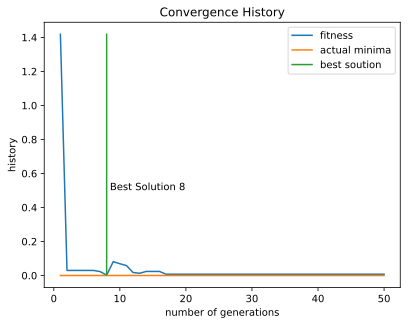

In [21]:
spht = TestFunctionN(func=(Sphere,3), crossover_method='single_point' \
                     , selection_method='tournament', mutation_method='polynomial', eta=20)
spht.evolve(50)

In [ ]:
def Sphere(*x):
	return np.sum(np.array([i**2 for i in x]), axis=0)

In [ ]:
x1 = np.array([1, 6, 8, 0, 2])
x2 = np.array([1, 6, 8, 0, 2])
x4 = np.array([1, 6, 8, 0, 2])
x3 = np.array([1, 6, 8, 0, 2])
print(Sphere(x1, x2, x3, x4))

[  4 144 256   0  16]


In [ ]:
spht = TestFunctionN(func=(sphere,3), crossover_method='single_point' \
                     , selection_method='tournament', mutation_method='polynomial', eta=20)
spht.evolve(50)

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: x: [-0.19660486  0.31456386  0.57097135], z: [0.46361218]
Iteration 2: x: [ 0.14064406  0.01731706 -0.30950074], z: [0.11587134]
Iteration 3: x: [ 0.12246607  0.09384667 -0.08430409], z: [0.03091232]
Iteration 4: x: [-0.04175007  0.48396925 -0.27322942], z: [0.31062363]
Iteration 5: x: [0.1191209  0.20553868 0.3273527 ], z: [0.16359573]
Iteration 6: x: [-0.16345416  0.1514521   0.03297476], z: [0.05074234]
Iteration 7: x: [-0.13648364 -0.05841556  0.11937256], z: [0.03628997]
Iteration 8: x: [0.07222478 0.1281548  0.09701988], z: [0.03105293]
Iteration 9: x: [0.12188322 0.12749678 0.1849939 ], z: [0.06533369]
Iteration 10: x: [0.07575574 0.08572877 0.06318533], z: [0.01708074]
Iteration 11: x: [-0.00160883  0.08574573  0.31979151], z: [0.10962153]
Iteration 12: x: [-0.11879003  0.15939267  0.09616352], z: [0.04876452]
Iteration 13: x: [ 0.03203962 -0.26963367  0.18075739], z: [0.10640209]
Iteration 14: x: [ 0.22477245 -0.07928159  0.20474893], z: [0.09873035]
Iteration 15:

array([-0.02310885,  0.1734689 , -0.0415154 ])

In [22]:
# ----------------- Rastrigin -------------------
def Rastrigin(x):
	try:
		A, n = 10, x.shape[1]
		out = A * n * np.ones(x[:,0].shape, dtype='float')
		for i in range(n):
			out += (x[:,i]**2 - A*np.cos(2*np.pi*x[:,i]))
		return out
	except:
		return (10 * x.shape[0]) + np.sum(np.array([i**2 - 10 * np.cos(2*np.pi*i) for i in x]))

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: x: [-1.05682988 -0.97959006  0.8545916 ], z: 7.410912284785031
Iteration 2: x: [ 1.02531729  0.0356934  -0.03113115], z: 1.620895614551909
Iteration 3: x: [ 0.94973407  0.02076399 -0.00439334], z: 1.4858500095244231
Iteration 4: x: [ 0.00547125 -0.04167766  0.0372558 ], z: 0.6227141560979703
Iteration 5: x: [-0.05942914  0.01047007 -0.04521102], z: 1.1171779170534677
Iteration 6: x: [ 0.0014942   0.01287085 -0.01681554], z: 0.08933638395107835
Iteration 7: x: [-0.06459957 -0.00650456 -0.00421924], z: 0.8285879202682196
Iteration 8: x: [0.0278777  0.01669677 0.00748384], z: 0.22015893795254016
Iteration 9: x: [0.03928284 0.00977641 0.00230058], z: 0.3246098503699315
Iteration 10: x: [0.02230313 0.00335852 0.00134187], z: 0.10112049254709632
Iteration 11: x: [ 0.03360106  0.01874272 -0.00309501], z: 0.2946775481917143
Iteration 12: x: [ 0.00380166 -0.00573278  0.05076639], z: 0.5163890626272618
Iteration 13: x: [-0.02026214 -0.02780615 -0.0258471 ], z: 0.36659753830520714
It

array([ 0.00104118, -0.01045011,  0.00219858])

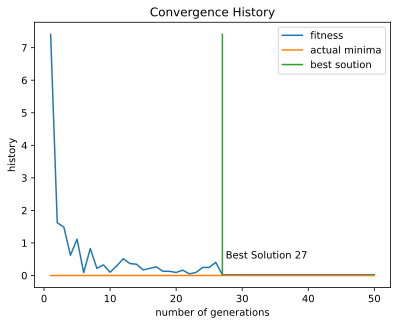

In [23]:
rst = TestFunctionN(func=(Rastrigin,3), num_pop=300, crossover_method='uniform' \
                     , selection_method='tournament', mutation_method='polynomial', eta=100)
rst.evolve(50)

In [24]:
# ------------------- Rosenbrock ------------------
def Rosenbrock(x):
    try:
        n = x.shape[1]
        out = np.zeros(x[:,0].shape, dtype='float')
        for i in range(n-1):
            out += 100 * (x[:,i+1] - x[:,i]**2)**2 + (1 - x[:,i])**2
        return out
    except:
        return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: x: [-0.20486291 -0.48258207  1.25954927], z: 28.96705710705914
Iteration 2: x: [0.49147674 0.38565835 0.40016751], z: 2.3353351378375837
Iteration 3: x: [0.34570556 0.20594573 0.17711382], z: 1.175174403536814
Iteration 4: x: [0.32673505 0.20650825 0.40316366], z: 1.4483409281281863
Iteration 5: x: [0.7106204  0.44723076 0.13498322], z: 0.41725354430679806
Iteration 6: x: [0.37753113 0.24524396 0.12949779], z: 1.4424882052320878
Iteration 7: x: [ 0.45921583  0.09718826 -0.01513643], z: 1.585009982341837
Iteration 8: x: [0.13887854 0.10207799 0.08136311], z: 1.4269608911964322
Iteration 9: x: [ 0.49835974  0.26785012 -0.07327014], z: 0.28961994720043377
Iteration 10: x: [0.50465828 0.33939977 0.13643152], z: 0.9631077012891295
Iteration 11: x: [0.44498436 0.22843211 0.11643958], z: 0.400586257705499
Iteration 12: x: [0.63397467 0.33848986 0.17218011], z: 0.5363620500708575
Iteration 13: x: [0.63397467 0.33848986 0.17218011], z: 0.5363620500708575
Iteration 14: x: [0.6339746

array([0.93582417, 0.86733296, 0.70035248])

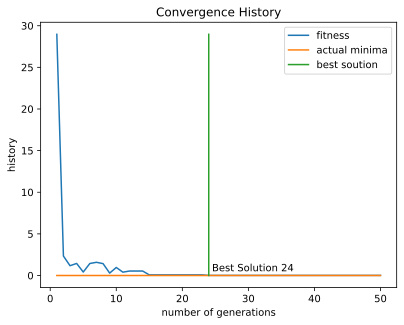

In [26]:
rsb = TestFunctionN(func=(Rosenbrock,3), num_pop=50, crossover_method='arithmetic' \
                     , selection_method='tournament', mutation_method='polynomial', eta=50)
rsb.evolve(50)

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: x: [-0.88418422 -0.99829839  0.95511733], z: 5.619095495990521
Iteration 2: x: [-0.98173775 -1.01979884  0.90445846], z: 4.713247971936191
Iteration 3: x: [-1.03431838 -0.98815557  0.98762302], z: 3.3111472078269983
Iteration 4: x: [-0.99761587 -0.99758032  0.99685965], z: 2.9883573099247016
Iteration 5: x: [-0.98564062 -0.99037716  0.99585311], z: 3.006397843023528
Iteration 6: x: [-0.99770073 -0.99741687  1.00401092], z: 3.0038210672313497
Iteration 7: x: [-0.99455553 -1.00242661  0.99291082], z: 2.9968031689542087
Iteration 8: x: [-0.98684049 -1.00348565  0.99735372], z: 3.0134959402746304
Iteration 9: x: [-0.99498846 -0.99699941  0.99420061], z: 2.98581722096894
Iteration 10: x: [-0.99101887 -0.99675916  0.99354682], z: 2.988992186100454
Iteration 11: x: [-0.99243791 -0.9954822   0.98953487], z: 2.9920218524403133
Iteration 12: x: [-0.9948473  -0.98599355  0.99152377], z: 3.003142265991549
Iteration 13: x: [-0.9947053  -1.00281574  0.99838962], z: 2.999469877379603
Ite

array([-0.99448787, -0.9929948 ,  0.99406701])

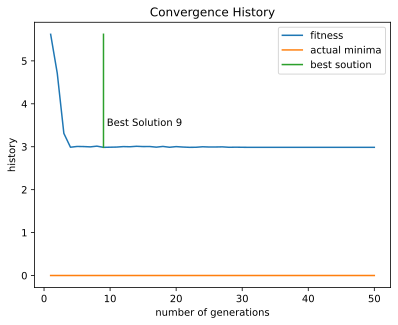

In [15]:
rst = TestFunctionN(func=(Rastrigin,3), num_pop=150, crossover_method='uniform' \
                     , selection_method='tournament', mutation_method='polynomial', eta=500)
rst.evolve(50)